In [1]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style
import unicodedata
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

style.use('fivethirtyeight')

from PIL import Image
import urllib
import os
import math
from PIL import Image
import matplotlib.image as image
pd.options.display.max_columns = None

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warnin

In [2]:
keepers = ['GK']
defenders = ["DF",'DF,MF']
wing_backs = ['FW,DF','DF,FW']
midfielders = ['MF,DF','MF']
forwards = ['FW','MF,FW',"FW,MF"]
def position_grouping(x):
    if x in keepers:
        return "GK"
    elif x in defenders:
        return "Defender"
    elif x in wing_backs:
        return "Wing-Back"
    elif x in midfielders:
        return "Central Midfielders"
    elif x in forwards:
        return "Forwards"
    else:
        return "unidentified position"

In [3]:
# Top 5 Europeans Legaues for advanced Analysis 

# fbref_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
# fbref_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
# fbref_pass_type = 'https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats'
# fbref_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
# fbref_gca = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'
# fbref_poss = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'
# fbref_misc = 'https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats'

# Premier Legaue Stats for blog posts

fbref_passing = 'https://fbref.com/en/comps/9/passing/Premier-League-Stats'
fbref_shooting = 'https://fbref.com/en/comps/9/shooting/Premier-League-Stats'
fbref_pass_type = 'https://fbref.com/en/comps/9/passing_types/Premier-League-Stats'
fbref_defence = 'https://fbref.com/en/comps/9/gca/Premier-League-Stats'
fbref_gca = 'https://fbref.com/en/comps/9/defense/Premier-League-Stats'
fbref_poss = 'https://fbref.com/en/comps/9/possession/Premier-League-Stats'
fbref_misc = 'https://fbref.com/en/comps/9/misc/Premier-League-Stats'

In [4]:
def create_full_stats_db(fbref_passing,fbref_shooting,fbref_pass_type,fbref_defence,fbref_gca,fbref_poss,fbref_misc):
    # Passing columns 
    pass_ = fbref_passing
    page =requests.get(pass_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_).text.replace('<!--', '').replace('-->', '')
    pass_df = pd.read_html(html_content)
    pass_df[-1].columns = pass_df[-1].columns.droplevel(0)
    pass_stats = pass_df[-1]
    pass_prefixes = {1: 'Total - ', 2: 'Short - ', 3: 'Medium - ', 4: 'Long - '}
    pass_column_occurrences = {'Cmp': 0, 'Att': 0, 'Cmp%': 0}
    pass_new_column_names = []
    for col_name in pass_stats.columns:
        if col_name in pass_column_occurrences:
            pass_column_occurrences[col_name] += 1
            prefix = pass_prefixes[pass_column_occurrences[col_name]]
            pass_new_column_names.append(prefix + col_name)
        else:
            pass_new_column_names.append(col_name)
    pass_stats.columns = pass_new_column_names
    pass_stats = pass_stats[pass_stats['Player'] != 'Player']

    # Shooting columns 
    shot_ = fbref_shooting
    page =requests.get(shot_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(shot_).text.replace('<!--', '').replace('-->', '')
    shot_df = pd.read_html(html_content)
    shot_df[-1].columns = shot_df[-1].columns.droplevel(0) # drop top header row
    shot_stats = shot_df[-1]
    shot_stats = shot_stats[shot_stats['Player'] != 'Player']    



    # Pass Type columns 
    pass_type = fbref_pass_type
    page =requests.get(pass_type)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_type).text.replace('<!--', '').replace('-->', '')
    pass_type_df = pd.read_html(html_content)
    pass_type_df[-1].columns = pass_type_df[-1].columns.droplevel(0) # drop top header row
    pass_type_stats = pass_type_df[-1]
    pass_type_stats = pass_type_stats[pass_type_stats['Player'] != 'Player']


    # GCA columns 
    gca_ = fbref_gca
    page =requests.get(gca_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(gca_).text.replace('<!--', '').replace('-->', '')
    gca_df = pd.read_html(html_content)
    gca_df[-1].columns = gca_df[-1].columns.droplevel(0)
    gca_stats = gca_df[-1]
    gca_prefixes = {1: 'SCA - ', 2: 'GCA - '}
    gca_column_occurrences = {'PassLive': 0, 'PassDead': 0, 'TO%': 0, 'Sh': 0, 'Fld': 0, 'Def': 0}
    gca_new_column_names = []
    for col_name in gca_stats.columns:
        if col_name in gca_column_occurrences:
            gca_column_occurrences[col_name] += 1
            prefix = gca_prefixes[gca_column_occurrences[col_name]]
            gca_new_column_names.append(prefix + col_name)
        else:
            gca_new_column_names.append(col_name)
    gca_stats.columns = gca_new_column_names
    gca_stats = gca_stats[gca_stats['Player'] != 'Player']
    

    # Defense columns 
    defence_ = fbref_defence
    page =requests.get(defence_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(defence_).text.replace('<!--', '').replace('-->', '')
    defence_df = pd.read_html(html_content)
    defence_df[-1].columns = defence_df[-1].columns.droplevel(0) # drop top header row
    defence_stats = defence_df[-1]
    rename_columns = {
    'Def 3rd': 'Tackles - Def 3rd',
    'Mid 3rd': 'Tackles - Mid 3rd',
    'Att 3rd': 'Tackles - Att 3rd',
    'Blocks': 'Total Blocks',
    'Sh': 'Shots Blocked',
    'Pass': 'Passes Blocked'}
    defence_stats.rename(columns = rename_columns, inplace=True)
    defence_prefixes = {1: 'Total - ', 2: 'Dribblers- '}
    defence_column_occurrences = {'Tkl': 0}
    new_column_names = []
    for col_name in defence_stats.columns:
        if col_name in defence_column_occurrences:
            defence_column_occurrences[col_name] += 1
            prefix = defence_prefixes[defence_column_occurrences[col_name]]
            new_column_names.append(prefix + col_name)
        else:
            new_column_names.append(col_name)
    defence_stats.columns = new_column_names
    defence_stats = defence_stats[defence_stats['Player'] != 'Player']


    # possession columns 
    poss_ = fbref_poss
    page =requests.get(poss_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(poss_).text.replace('<!--', '').replace('-->', '')
    poss_df = pd.read_html(html_content)
    poss_df[-1].columns = poss_df[-1].columns.droplevel(0) # drop top header row
    poss_stats = poss_df[-1]
    rename_columns = {
    'TotDist': 'Carries - TotDist',
    'PrgDist': 'Carries - PrgDist',
    'PrgC': 'Carries - PrgC',
    '1/3': 'Carries - 1/3',
    'CPA': 'Carries - CPA',
    'Mis': 'Carries - Mis',
    'Dis': 'Carries - Dis',
    'Att': 'Take Ons - Attempted'  }
    poss_stats.rename(columns=rename_columns, inplace=True)
    poss_stats = poss_stats[poss_stats['Player'] != 'Player']


    # misc columns 
    misc_ = fbref_misc
    page =requests.get(misc_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(misc_).text.replace('<!--', '').replace('-->', '')
    misc_df = pd.read_html(html_content)
    misc_df[-1].columns = misc_df[-1].columns.droplevel(0) # drop top header row
    misc_stats = misc_df[-1]
    misc_stats = misc_stats[misc_stats['Player'] != 'Player']

    index_df = misc_stats[['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s']]

    data_frames = [poss_stats, misc_stats, pass_stats ,defence_stats, shot_stats, gca_stats, pass_type_stats]
    for df in data_frames:
        if df is not None:  # Checking if the DataFrame exists
            df.drop(columns=['Matches', 'Rk', 'Comp'], inplace=True, errors='ignore')
            df.dropna(axis=0, how='any', inplace=True)

            index_df = pd.merge(index_df, df, on=['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s'], how='left')
    index_df["position_group"] = index_df.Pos.apply(lambda x: position_grouping(x))  

    index_df.fillna(0, inplace=True)

    non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
    
    def clean_non_convertible_values(value):
        try:
            return pd.to_numeric(value)
        except (ValueError, TypeError):
            return np.nan

    index_df = index_df.reset_index()

    # Iterate through each column, converting non-numeric columns to numeric
    for col in index_df.columns:
        if col not in non_numeric_cols:
            index_df[col] = index_df[col].apply(clean_non_convertible_values)

    
    return index_df



In [5]:
def per_90fi(dataframe):
    # Replace empty strings ('') with NaN
    dataframe = dataframe.replace('', np.nan)
    
    # Fill NaN values with 0
    dataframe = dataframe.fillna(0)
    
    # Identify numeric columns excluding '90s' and columns with '90' or '%' in their names
    exclude_columns = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'position_group']
    numeric_columns = [col for col in dataframe.columns if np.issubdtype(dataframe[col].dtype, np.number) 
                       and col != '90s' and not any(exc_col in col for exc_col in exclude_columns)
                       and ('90' not in col) and ('%' not in col)]
    
    # Create a mask to avoid division by zero
    mask = (dataframe['90s'] != 0)
    
    # Divide each numeric column by the '90s' column row-wise
    dataframe.loc[mask, numeric_columns] = dataframe.loc[mask, numeric_columns].div(dataframe.loc[mask, '90s'], axis=0)

    return dataframe



In [6]:
stats = create_full_stats_db(fbref_passing,fbref_shooting,fbref_pass_type,fbref_defence,fbref_gca,fbref_poss,fbref_misc)

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
stats

index                  Player   Nation    Pos            Squad     Age  \
0        0              Max Aarons  eng ENG     DF      Bournemouth  24-059   
1        1      Bénie Adama Traore   ci CIV  FW,MF    Sheffield Utd  21-094   
2        2        Tosin Adarabioyo  eng ENG     DF           Fulham  26-161   
3        3          Elijah Adebayo  eng ENG     FW       Luton Town  26-056   
4        4           Simon Adingra   ci CIV     FW         Brighton  22-062   
5        5            Nayef Aguerd   ma MAR     DF         West Ham  27-339   
6        6        Brandon Aguilera   cr CRC     FW  Nott'ham Forest  20-249   
7        7        Naouirou Ahamada   fr FRA  MF,FW   Crystal Palace  21-340   
8        8        Anel Ahmedhodžić   ba BIH     DF    Sheffield Utd  24-343   
9        9                Ola Aina   ng NGA     DF  Nott'ham Forest  27-147   
10      10         Rayan Aït Nouri   dz ALG  DF,MF           Wolves  22-271   
11      11         Kristoffer Ajer   no NOR     DF        Brentford  25-321   
12      12           Manuel Akanji   ch SUI  DF,MF  Manchester City  28-228   
13      13              Nathan Aké   nl NED     DF  Manchester City  29-014   
14      14        Thiago Alcántara   es ESP     MF        Liverpool  32-327   
15      15  Trent Alexander-Arnold  eng ENG     DF        Liverpool  25-148   
16      16                 Alisson   br BRA     GK        Liverpool  31-153   
17      17          Miguel Almirón   py PAR     FW    Newcastle Utd  30-022   
18      18           Edson Álvarez   mx MEX     MF         West Ham  26-131   
19      19          Julián Álvarez   ar ARG  MF,FW  Manchester City  24-032   
20      20            Zeki Amdouni   ch SUI     FW          Burnley  23-090   
21      21          Sofyan Amrabat   ma MAR  MF,DF   Manchester Utd  27-195   
22      22        Joachim Andersen   dk DEN     DF   Crystal Palace  27-277   
23      23         Elliot Anderson  sct SCO  MF,FW    Newcastle Utd  21-118   
24      24          Jaidon Anthony  eng ENG     FW      Bournemouth  24-093   
25      25         Michail Antonio   jm JAM     FW         West Ham  33-341   
26      26                  Antony   br BRA     FW   Manchester Utd  24-008   
27      27          Cameron Archer  eng ENG  FW,MF    Sheffield Utd  22-226   
28      28          Cameron Archer  eng ENG     MF      Aston Villa  22-226   
29      29         Alphonse Areola   fr FRA     GK         West Ham  31-005   
..     ...                     ...      ...    ...              ...     ...   
523    523             Kyle Walker  eng ENG     DF  Manchester City  33-280   
524    524       Aaron Wan-Bissaka  eng ENG     DF   Manchester Utd  26-098   
525    525               Joel Ward  eng ENG     DF   Crystal Palace  34-126   
526    526       James Ward-Prowse  eng ENG     MF         West Ham  29-123   
527    527       Deivid Washington   br BRA     DF          Chelsea  18-272   
528    528           Ollie Watkins  eng ENG     FW      Aston Villa  28-064   
529    529            Adam Webster  eng ENG     DF         Brighton  29-059   
530    530           Danny Welbeck  eng ENG  FW,MF         Brighton  33-098   
531    531             Timo Werner   de GER     FW        Tottenham  27-363   
532    532            Adam Wharton  eng ENG     MF   Crystal Palace  19-275   
533    533               Ben White  eng ENG     DF          Arsenal  26-147   
534    534               Joe White  eng ENG     MF    Newcastle Utd  21-154   
535    535           Neco Williams  wls WAL  DF,FW  Nott'ham Forest  22-325   
536    536                 Willian   br BRA     FW           Fulham  35-207   
537    537             Joe Willock  eng ENG  MF,FW    Newcastle Utd  24-196   
538    538           Callum Wilson  eng ENG     FW    Newcastle Utd  32-005   
539    539            Harry Wilson  wls WAL     FW           Fulham  26-347   
540    540             Yoane Wissa   cd COD     FW        Brentford  27-182   
541    541              Chris Wood   nz NZL     FW  Not

In [8]:
player_name = "Ivan Toney"  

In [9]:
player_row = stats.loc[stats['Player'] == player_name]
if not player_row.empty:
    position = player_row['position_group'].values[0]
    print(f"The position of {player_name} is {position}.")
else:
    print(f"Player {player_name} not found in the dataset.")


The position of Ivan Toney is Forwards.


In [12]:
def key_stats_db(df,position):
    non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
    core_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Blocks_x', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    df.dropna(axis=0, how='any', inplace=True)
    key_stats_df = df[df['position_group'] == position]
    key_stats_df = key_stats_df[non_numeric_cols + core_stats]
    key_stats_df = key_stats_df[key_stats_df['90s'] > 5]
    key_stats_df = per_90fi(key_stats_df)
    return key_stats_df


key_stats_df = key_stats_db(stats,position)

In [14]:
def create_metrics_scores(key_stats_df):
    # Define the key_stats grouped by the metrics
    core_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Blocks_x', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    passing_metrics = ['Total - Cmp%', 'KP', 'TB', 'Sw', 'PPA', 'PrgP']
    defending_metrics = ['Tkl%', 'Blocks_x', 'Tkl+Int', 'Clr']
    creation_metrics = ['Carries - PrgDist', 'SCA90', 'GCA90', 'CrsPA', 'xA', 'Rec', 'PrgR']
    shooting_metrics = ['xG', 'Sh', 'SoT']

    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()

    # Normalize the metrics
    stats_normalized = key_stats_df.copy()  # Create a copy of the DataFrame
    stats_normalized[core_stats] = scaler.fit_transform(stats_normalized[core_stats])

    # Calculate scores for each metric grouping and scale to 0-10
    stats_normalized['Passing_Score'] = stats_normalized[passing_metrics].mean(axis=1) * 10
    stats_normalized['Defending_Score'] = stats_normalized[defending_metrics].mean(axis=1) * 10
    stats_normalized['Creation_Score'] = stats_normalized[creation_metrics].mean(axis=1) * 10
    stats_normalized['Shooting_Score'] = stats_normalized[shooting_metrics].mean(axis=1) * 10

    # Add a small offset to ensure unique scores
    stats_normalized['Passing_Score'] += stats_normalized.index * 0.001
    stats_normalized['Defending_Score'] += stats_normalized.index * 0.001
    stats_normalized['Creation_Score'] += stats_normalized.index * 0.001
    stats_normalized['Shooting_Score'] += stats_normalized.index * 0.001

    # Clip scores to ensure they are within the 0-10 range
    stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']] = stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']].clip(lower=0, upper=10)
    return stats_normalized

def adjust_player_rating_range(dataframe):
    # Get the 'total player rating' column
    player_ratings = dataframe[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
    
    # Define the desired range for the ratings
    min_rating = 4.5
    max_rating = 9.5
    
    # Normalize the ratings to be within the desired range (5 to 9.5) for each column
    for col in player_ratings.columns:
        normalized_ratings = min_rating + (max_rating - min_rating) * ((player_ratings[col] - player_ratings[col].min()) / (player_ratings[col].max() - player_ratings[col].min()))
        dataframe[col] = normalized_ratings
    
    return dataframe


pitch_iq_scoring = create_metrics_scores(key_stats_df)
pitch_iq_scoring = adjust_player_rating_range(pitch_iq_scoring)
pitch_iq_scoring = pitch_iq_scoring[['Player','Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
pitch_iq_scores = pd.merge(key_stats_df, pitch_iq_scoring, on='Player', how='left')


In [15]:
pitch_iq_scores

Player   Nation    Pos            Squad     Age  \
0            Elijah Adebayo  eng ENG     FW       Luton Town  26-056   
1             Simon Adingra   ci CIV     FW         Brighton  22-062   
2            Miguel Almirón   py PAR     FW    Newcastle Utd  30-022   
3            Julián Álvarez   ar ARG  MF,FW  Manchester City  24-032   
4              Zeki Amdouni   ch SUI     FW          Burnley  23-090   
5           Michail Antonio   jm JAM     FW         West Ham  33-341   
6                    Antony   br BRA     FW   Manchester Utd  24-008   
7            Cameron Archer  eng ENG  FW,MF    Sheffield Utd  22-226   
8             Taiwo Awoniyi   ng NGA     FW  Nott'ham Forest  26-204   
9               Jordan Ayew   gh GHA  FW,MF   Crystal Palace  32-174   
10              Leon Bailey   jm JAM  MF,FW      Aston Villa  26-207   
11   Jean-Ricner Bellegarde   fr FRA  MF,FW           Wolves  25-250   
12            Saïd Benrahma   dz ALG  FW,MF         West Ham  28-206   
13                     Beto   gw GNB     FW          Everton  26-032   
14             Jarrod Bowen  eng ENG     FW         West Ham  27-074   
15              Jacob Brown  sct SCO  MF,FW       Luton Town  25-328   
16       Jacob Bruun Larsen   dk DEN  MF,FW          Burnley  25-166   
17       Facundo Buonanotte   ar ARG  MF,FW         Brighton  19-071   
18    Dominic Calvert-Lewin  eng ENG     FW          Everton  26-353   
19            Matheus Cunha   br BRA  FW,MF           Wolves  24-281   
20                   Danilo   br BRA  MF,FW  Nott'ham Forest  22-309   
21           Arnaut Danjuma   nl NED  MF,FW          Everton  27-032   
22             Moussa Diaby   fr FRA  FW,MF      Aston Villa  24-240   
23                Luis Díaz   co COL     FW        Liverpool  27-050   
24              Jeremy Doku   be BEL  FW,MF  Manchester City  21-281   
25        Nicolás Domínguez   ar ARG  MF,FW  Nott'ham Forest  25-249   
26       Abdoulaye Doucouré   ml MLI  FW,MF          Everton  31-062   
27          Odsonne Édouard   fr FRA  FW,MF   Crystal Palace  26-047   
28           Anthony Elanga   se SWE     FW  Nott'ham Forest  21-311   
29           Harvey Elliott  eng ENG  MF,FW        Liverpool  20-334   
..                      ...      ...    ...              ...     ...   
80            Lucas Paquetá   br BRA  FW,MF         West Ham  26-189   
81             Aaron Ramsey  eng ENG  MF,FW          Burnley  21-042   
82             Jacob Ramsey  eng ENG  MF,FW      Aston Villa  22-280   
83          Marcus Rashford  eng ENG     FW   Manchester Utd  26-124   
84               Bobby Reid   jm JAM     FW           Fulham  31-030   
85              Richarlison   br BRA     FW        Tottenham  26-298   
86            Jay Rodriguez  eng ENG     FW          Burnley  34-218   
87              Bukayo Saka  eng ENG     FW          Arsenal  22-180   
88            Mohamed Salah   eg EGY     FW        Liverpool  31-262   
89            Pablo Sarabia   es ESP  MF,FW           Wolves  31-297   
90          Jeffrey Schlupp   gh GHA  FW,MF   Crystal Palace  31-071   
91          Antoine Semenyo   gh GHA     FW      Bournemouth  24-056   
92           Bernardo Silva   pt POR  MF,FW  Manchester City  29-206   
93          Luis Sinisterra   co COL  FW,MF      Bournemouth  24-260   
94             Oliver Skipp  eng ENG  MF,FW        Tottenham  23-169   
95          Dominic Solanke  eng ENG     FW      Bournemouth  26-171   
96          Raheem Sterling  eng ENG  FW,MF          Chelsea  29-086   
97         Marcus Tavernier  eng ENG     FW      Bournemouth  24-347   
98          Youri Tielemans   be BEL  MF,FW      Aston Villa  26-301   
99               Ivan Toney  eng ENG     FW        Brentford  27-353   
100         Andros Townsend  eng ENG  MF,FW       Luton Town  32-231   
101        Leandro Trossard   be BEL  FW,MF          Arsenal  29-090   
102           Ollie Watkins  eng ENG     FW      Aston Villa  28-064   
103           Danny Welbeck  eng ENG  FW,MF         Brighton 

## Creating Player Similarity Model 
### K Means Clustering 

In [16]:
def create_kmeans_df(df): 
    KMeans_cols = ['Player','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Blocks_x', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']

    df = df[KMeans_cols]
    player_names = df['Player'].tolist() 

    df = df.drop(['Player'], axis = 1) 

    x = df.values 
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    X_norm = pd.DataFrame(x_scaled)

    pca = PCA(n_components = 2)
    reduced = pd.DataFrame(pca.fit_transform(X_norm))

    wcss = [] 
    for i in range(1, 11): 
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(reduced) 
        wcss.append(kmeans.inertia_)

    kmeans = KMeans(n_clusters=6)
    kmeans = kmeans.fit(reduced)

    labels = kmeans.predict(reduced)
    clusters = kmeans.labels_.tolist()

    reduced['cluster'] = clusters
    reduced['name'] = player_names
    reduced.columns = ['x', 'y', 'cluster', 'name']

    reduced['cluster'] = clusters
    reduced['name'] = player_names
    reduced.columns = ['x', 'y', 'cluster', 'name']
    reduced.head()

    return reduced

kmeans_df = create_kmeans_df(key_stats_df)



/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


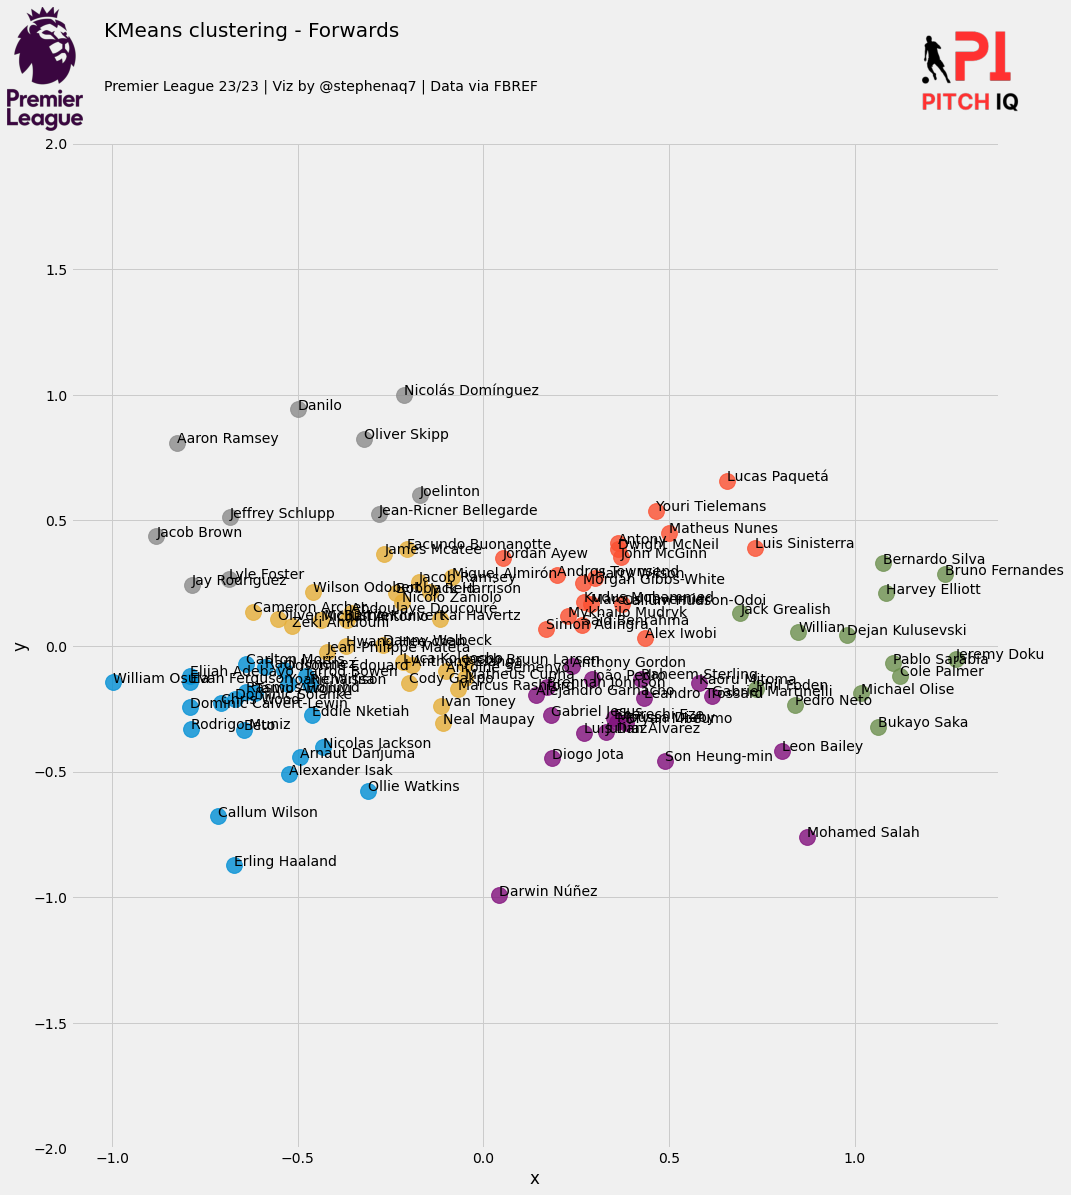

In [17]:
def create_clustering_chart(df,position):
    # Create the scatter plot using lmplot
    ax = sns.lmplot(x="x", y="y", hue='cluster', data=df, legend=False,
                    fit_reg=False, size=15, scatter_kws={"s": 250})

    texts = []
    for x, y, s in zip(df.x, df.y, df.name):
        texts.append(plt.text(x, y, s,fontweight='light'))


    # Additional axes for logos and titles
    fig = plt.gcf()
    ax1 = plt.gca()

    # Add title and logos to the current figure
    fig.text(.1, 1.08, f'KMeans clustering - {position}', size=20, font='Karla')
    fig.text(.1, 1.03, 'Premier League 23/23 | Viz by @stephenaq7 | Data via FBREF', size=14, font='Karla')

    ax2 = fig.add_axes([0.01, 0.175, 0.07, 1.75])
    ax2.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
    ax2.imshow(img)

    ax3 = fig.add_axes([0.85, 0.175, 0.1, 1.75])
    ax3.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
    ax3.imshow(img)

    # Set axis limits and labels for the lmplot
    ax1.set(ylim=(-2, 2))
    plt.tick_params(labelsize=15)
    plt.xlabel("PC 1", fontsize=20)
    plt.ylabel("PC 2", fontsize=20)

    plt.tight_layout()
    plt.show()
    
create_clustering_chart(kmeans_df,position)

In [18]:
def find_similar_players(player_name, df, top_n=10):
    player = df[df['name'] == player_name].iloc[0]
    df['distance'] = np.sqrt((df['x'] - player['x'])**2 + (df['y'] - player['y'])**2)
    
    max_distance = df['distance'].max()  
    
    df['perc_similarity'] = ((max_distance - df['distance']) / max_distance) * 100
    
    similar_players = df.sort_values('distance').head(top_n + 1)  
    similar_players = similar_players[1:] 
    
    return similar_players


In [19]:
similairty_table = find_similar_players(player_name, kmeans_df)[['name','perc_similarity']]


In [20]:
similairty_table.rename(columns={'name': 'Player'}, inplace=True)
# Assuming 'pitchiq_scores' and 'similarity' are the DataFrames and you want to merge based on the 'Player' column
mertrics_similarity = pd.merge(similairty_table, pitch_iq_scores, on='Player', how='left')


In [21]:
mertrics_similarity

Player  perc_similarity   Nation    Pos            Squad  \
0         Neal Maupay        95.165241   fr FRA     FW        Brentford   
1     Marcus Rashford        94.483807  eng ENG     FW   Manchester Utd   
2          Cody Gakpo        91.367451   nl NED  FW,MF        Liverpool   
3       Matheus Cunha        91.192859   br BRA  FW,MF           Wolves   
4     Antoine Semenyo        90.482655   gh GHA     FW      Bournemouth   
5  Jacob Bruun Larsen        87.718948   dk DEN  MF,FW          Burnley   
6      Anthony Elanga        87.677370   se SWE     FW  Nott'ham Forest   
7       Luca Koleosho        86.222710   it ITA  MF,FW          Burnley   
8  Alejandro Garnacho        82.164416   ar ARG     FW   Manchester Utd   
9       Danny Welbeck        80.152890  eng ENG  FW,MF         Brighton   

      Age position_group   90s  Total - Cmp%        KP        TB        Sw  \
0  27-202       Forwards  13.2          71.7  0.984848  0.303030  0.151515   
1  26-124       Forwards  20.3          73.7  0.935961  0.197044  0.197044   
2  24-301       Forwards  12.8          76.1  1.015625  0.000000  0.078125   
3  24-281       Forwards  21.8          78.8  1.146789  0.321101  0.275229   
4  24-056       Forwards  12.8          71.5  1.250000  0.078125  0.156250   
5  25-166       Forwards   5.4          71.4  2.037037  0.185185  0.185185   
6  21-311       Forwards  20.1          66.5  1.194030  0.199005  0.049751   
7  19-170       Forwards  10.8          70.1  1.018519  0.000000  0.000000   
8  19-246       Forwards  17.8          74.0  1.966292  0.112360  0.168539   
9  33-098       Forwards  11.1          83.9  0.990991  0.180180  0.090090   

        PPA      PrgP  Tkl%  Blocks_x   Tkl+Int       Clr  Carries - PrgDist  \
0  1.287879  2.575758  23.1  0.606061  0.909091  0.227273          40.606061   
1  1.280788  2.709360  23.8  0.591133  0.788177  0.591133         101.773399   
2  1.406250  4.140625  28.6  1.406250  2.031250  0.546875          70.000000   
3  1.146789  2.752294  33.3  1.055046  1.697248  0.733945         123.532110   
4  1.328125  2.343750  37.5  1.484375  1.406250  0.703125         107.031250   
5  1.111111  2.777778  42.9  0.185185  1.296296  1.111111          94.074074   
6  0.895522  1.641791  50.0  0.995025  1.741294  0.746269          95.174129   
7  0.555556  1.759259  20.0  1.203704  0.833333  0.000000         128.055556   
8  0.842697  2.415730  25.0  1.011236  1.516854  0.955056         146.067416   
9  0.630631  2.432432  54.5  0.900901  1.981982  1.261261          53.693694   

   SCA90  GCA90     CrsPA        xA        Rec       PrgR        xG        Sh  \
0   2.89   0.38  0.151515  0.166667  25.454545   6.363636  0.401515  2.575758   
1   3.55   0.39  0.049261  0.123153  30.935961   7.438424  0.295567  2.660099   
2   2.82   0.39  0.000000  0.054687  31.093750   6.562500  0.476562  3.203125   
3   3.07   0.50  0.045872  0.110092  30.779817   4.954128  0.376147  2.706422   
4   2.73   0.39  0.234375  0.070312  28.593750   7.890625  0.195312  3.046875   
5   3.53   0.00  0.000000  0.074074  33.333333  12.962963  0.240741  2.962963   
6   2.28   0.45  0.199005  0.149254  26.417910   7.661692  0.293532  2.238806   
7   2.59   0.56  0.185185  0.101852  28.981481   7.592593  0.185185  2.129630   
8   4.15   0.45  0.168539  0.123596  35.561798  10.112360  0.303371  3.539326   
9   3.61   0.54  0.000000  0.099099  28.468468   5.675676  0.324324  2.522523   

        SoT  Passing_Score  Defending_Score  Creation_Score  Shooting_Score  
0  1.060606       6.490282         5.053212        5.949146        6.717814  
1  0.837438       6.563792         5.441187        6.309086        6.394312  
2  1.250000       6.386302         6.520379        5.578745        7.221043  
3  1.376147       6.752758         6.304229        5.976202        6.897427  
4  1.406250       6.454967         6.882896        6.284931        6.900647  
5  0.555556       6.606160         5.938136        5.899893        5.960396  
6  0.995025

In [22]:
comparative_list = list(mertrics_similarity.Player.unique())
sim_index = list(mertrics_similarity.perc_similarity.unique())
sim_index = [round(item, 2) for item in sim_index]


In [23]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [24]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [25]:
params = ['Total - Cmp%','KP',
'PPA',
 'PrgP',
 'Tkl%',
 'Blocks_x',
 'Tkl+Int',
 'Clr',
 'Carries - PrgDist',
 'SCA90',
 'xA',
 'xG']

In [26]:
main_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][params].values.tolist()
comp_player_1 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[0]][params].values.tolist()
comp_player_2 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[1]][params].values.tolist()
comp_player_3 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[2]][params].values.tolist()
comp_player_4 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[3]][params].values.tolist()
comp_player_5 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[4]][params].values.tolist()


main_player = [val for sublist in main_player for val in sublist]
comp_player_1 = [val for sublist in comp_player_1 for val in sublist]
comp_player_2 = [val for sublist in comp_player_2 for val in sublist]
comp_player_3 = [val for sublist in comp_player_3 for val in sublist]
comp_player_4 = [val for sublist in comp_player_4 for val in sublist]




findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


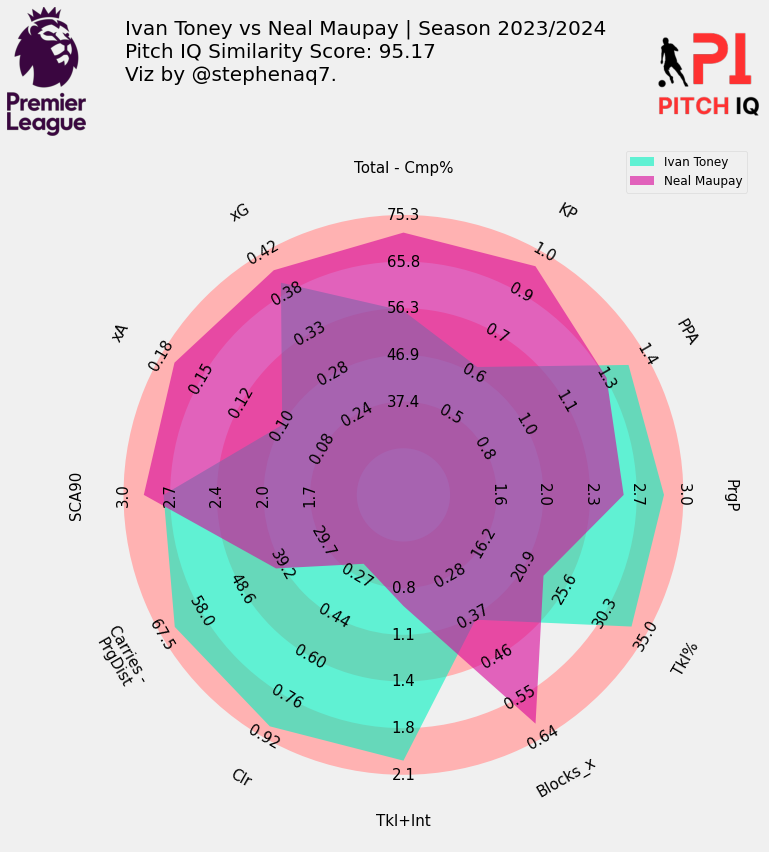

In [27]:

values = main_player
values_2 = comp_player_1

def convert_to_numeric(input_list):
    return [float(x) for x in input_list]  # Use int() instead of float() if integers are desired

# Convert string-based lists to numeric lists
numeric_values = convert_to_numeric(values)
numeric_comp_player_1 = convert_to_numeric(comp_player_1)

# Perform the calculations after converting to numeric lists
low = [min(value, value_2) * 0.5 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]
high = [max(value, value_2) * 1.05 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]

radar = Radar(params, low, high,
    
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=5,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)


fig, ax = radar.setup_axis()

fig.patch.set_facecolor('#f0f0f0')  # Adjust this color to match 'fivethirtyeight' style
ax.set_facecolor('#f0f0f0')  # Adjust axis background color to match the whitespace

rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2')
radar_output = radar.draw_radar_compare(values, values_2, ax=ax,
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15)

# Adding a legend for the radar comparison
ax.legend([f'{player_name}', comparative_list[0]], loc='upper right', fontsize=12)



# # ---- The Naught Boys Image
league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

fig_text(
    x = 0.75, y = 0.95, 
    s = f"{player_name} vs {comparative_list[0]} | Season 2023/2024\nPitch IQ Similarity Score: {sim_index[0]}\nViz by @stephenaq7.",
    va = "bottom", ha = "right",
    fontsize = 20, color = "black", font = "Karla", weight = "book"
)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.80, 0.09, 0.13, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)

# Show the plot
plt.show()


In [28]:
def plot_compairison_radars(params,comparative_list,pitch_iq_scores,mertrics_similarity,sim_index):

    main_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][params].values.tolist()
    comp_player_1 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[0]][params].values.tolist()
    comp_player_2 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[1]][params].values.tolist()
    comp_player_3 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[2]][params].values.tolist()
    comp_player_4 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[3]][params].values.tolist()
    comp_player_5 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[4]][params].values.tolist()


    main_player = [val for sublist in main_player for val in sublist]
    comp_player_1 = [val for sublist in comp_player_1 for val in sublist]
    comp_player_2 = [val for sublist in comp_player_2 for val in sublist]
    comp_player_3 = [val for sublist in comp_player_3 for val in sublist]
    comp_player_4 = [val for sublist in comp_player_4 for val in sublist]
    comp_player_5 = [val for sublist in comp_player_5 for val in sublist]

    all_comp_players = [comp_player_1,comp_player_2,comp_player_3,comp_player_4,comp_player_5]
    counter = 0
    for comp_player  in all_comp_players:
        
        values = main_player
        values_2 = comp_player

        def convert_to_numeric(input_list):
            return [float(x) for x in input_list]  # Use int() instead of float() if integers are desired

        # Convert string-based lists to numeric lists
        numeric_values = convert_to_numeric(values)
        numeric_comp_player_1 = convert_to_numeric(comp_player)

        # Perform the calculations after converting to numeric lists
        low = [min(value, value_2) * 0.5 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]
        high = [max(value, value_2) * 1.05 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]

        radar = Radar(params, low, high,
            
                    # whether to round any of the labels to integers instead of decimal places
                    round_int=[False]*len(params),
                    num_rings=5,  # the number of concentric circles (excluding center circle)
                    # if the ring_width is more than the center_circle_radius then
                    # the center circle radius will be wider than the width of the concentric circles
                    ring_width=1, center_circle_radius=1)


        fig, ax = radar.setup_axis()

        fig.patch.set_facecolor('#f0f0f0')  # Adjust this color to match 'fivethirtyeight' style
        ax.set_facecolor('#f0f0f0')  # Adjust axis background color to match the whitespace

        rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2')
        radar_output = radar.draw_radar_compare(values, values_2, ax=ax,
                                                kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                                kwargs_compare={f'facecolor': '#d80499', 'alpha': 0.6})
        radar_poly, radar_poly2, vertices1, vertices2 = radar_output
        range_labels = radar.draw_range_labels(ax=ax, fontsize=15,)
        param_labels = radar.draw_param_labels(ax=ax, fontsize=15)

        # Adding a legend for the radar comparison
        ax.legend([f'{player_name}', comparative_list[counter]], loc='upper right', fontsize=12)



        # # ---- The Naught Boys Image
        league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
        league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
        league_ax.imshow(league_icon)
        league_ax.axis("off")

        fig_text(
            x = 0.55, y = 0.90, 
            s = f"{player_name} vs {comparative_list[counter]}\nSeason 2023/2024\nPitch IQ Similarity Score: {sim_index[counter]}%\nViz by @stephenaq7.",
            va = "bottom", ha = "right",
            fontsize = 20, color = "black", font = "Karla", weight = "book"
        )


        ### Add Stats by Steve logo
        ax3 = fig.add_axes([0.80, 0.09, 0.13, 1.75])
        ax3.axis('off')
        img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
        ax3.imshow(img)
        counter += 1

        # Show the plot
        plt.show()


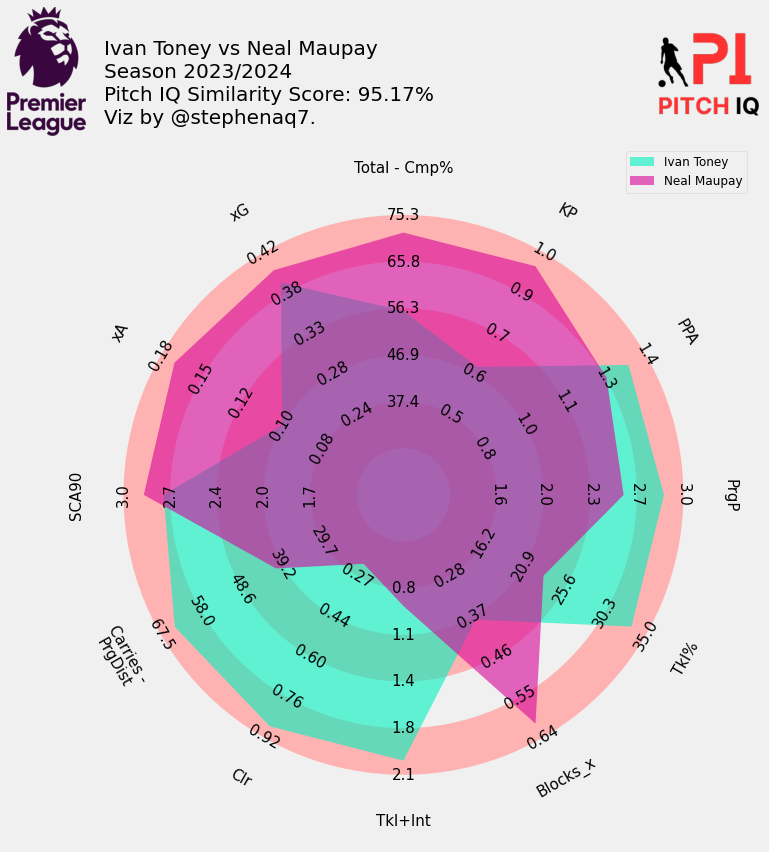

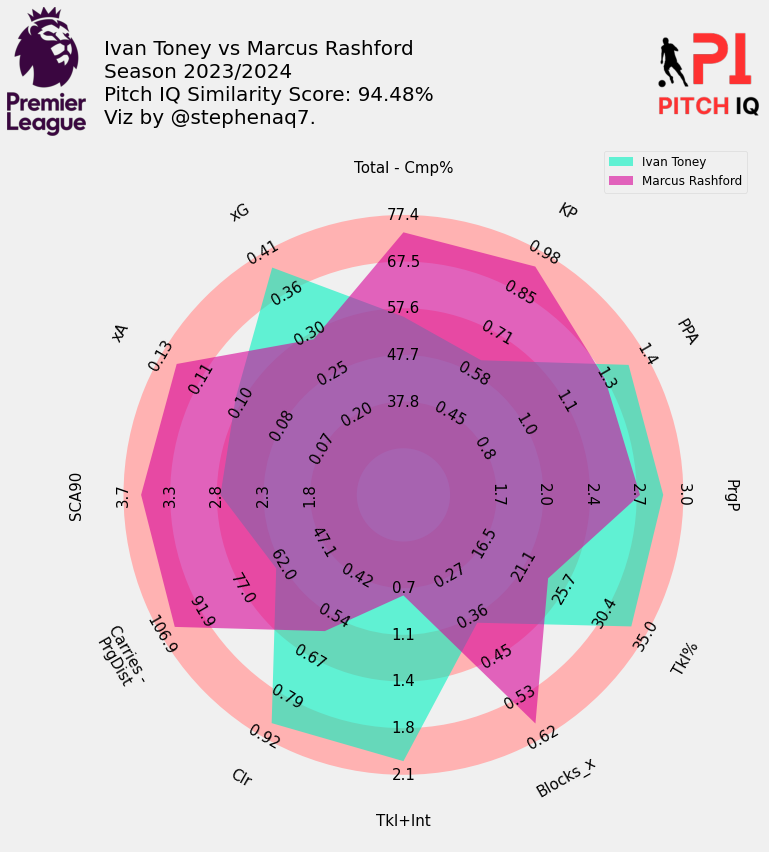

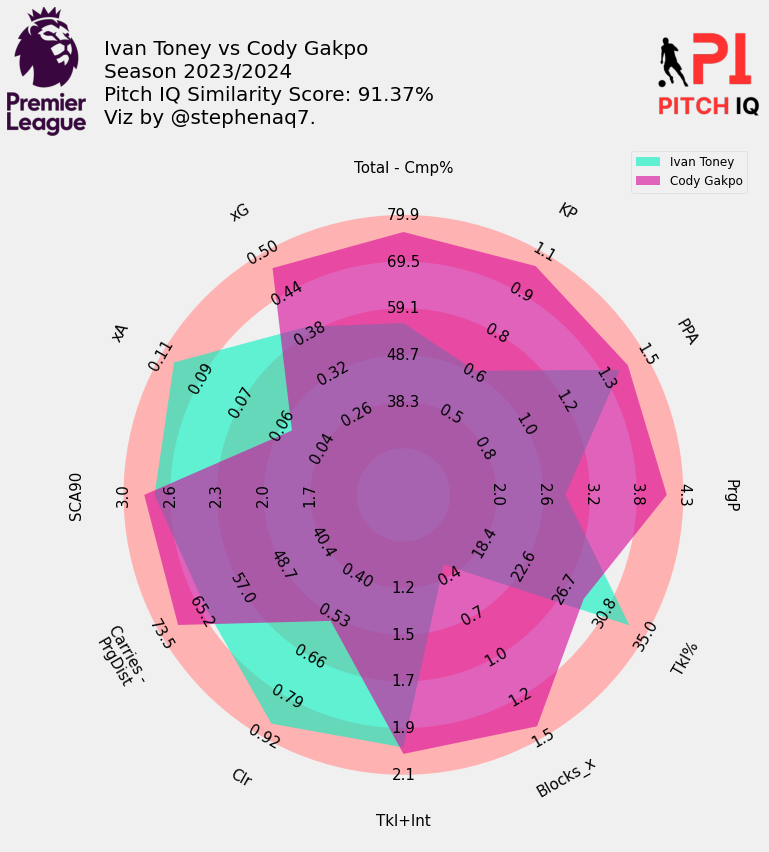

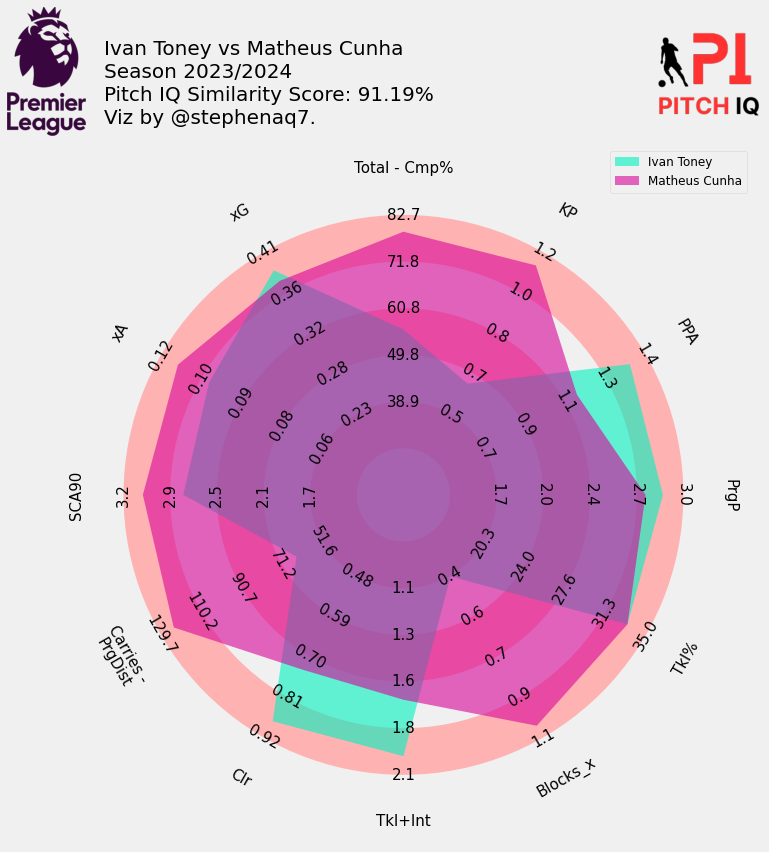

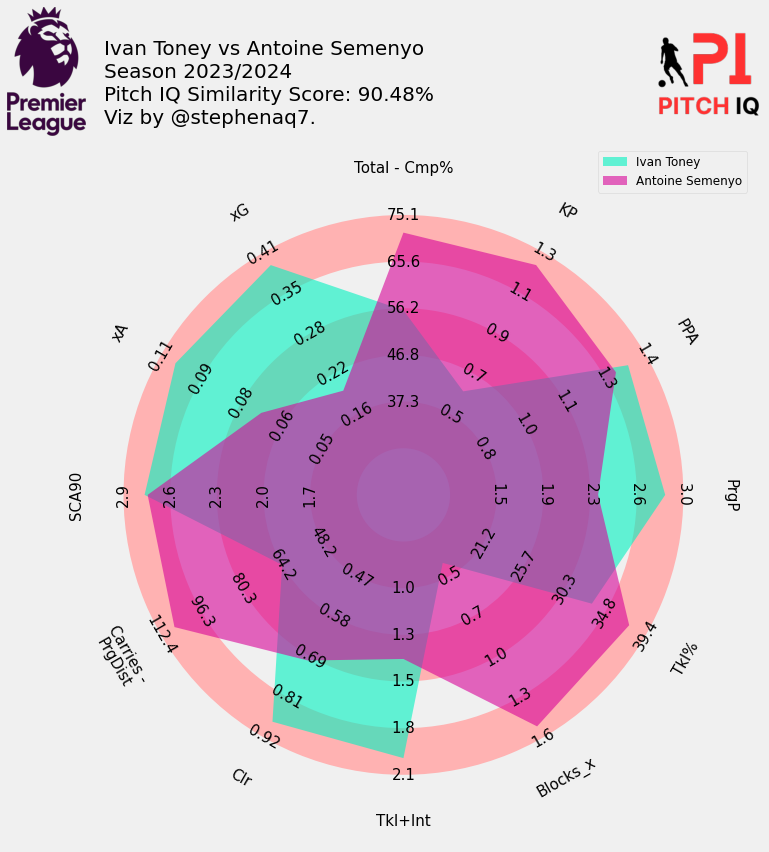

In [29]:
plot_compairison_radars(params,comparative_list,pitch_iq_scores,mertrics_similarity, sim_index)

In [30]:
mertrics_similarity

Player  perc_similarity   Nation    Pos            Squad  \
0         Neal Maupay        95.165241   fr FRA     FW        Brentford   
1     Marcus Rashford        94.483807  eng ENG     FW   Manchester Utd   
2          Cody Gakpo        91.367451   nl NED  FW,MF        Liverpool   
3       Matheus Cunha        91.192859   br BRA  FW,MF           Wolves   
4     Antoine Semenyo        90.482655   gh GHA     FW      Bournemouth   
5  Jacob Bruun Larsen        87.718948   dk DEN  MF,FW          Burnley   
6      Anthony Elanga        87.677370   se SWE     FW  Nott'ham Forest   
7       Luca Koleosho        86.222710   it ITA  MF,FW          Burnley   
8  Alejandro Garnacho        82.164416   ar ARG     FW   Manchester Utd   
9       Danny Welbeck        80.152890  eng ENG  FW,MF         Brighton   

      Age position_group   90s  Total - Cmp%        KP        TB        Sw  \
0  27-202       Forwards  13.2          71.7  0.984848  0.303030  0.151515   
1  26-124       Forwards  20.3          73.7  0.935961  0.197044  0.197044   
2  24-301       Forwards  12.8          76.1  1.015625  0.000000  0.078125   
3  24-281       Forwards  21.8          78.8  1.146789  0.321101  0.275229   
4  24-056       Forwards  12.8          71.5  1.250000  0.078125  0.156250   
5  25-166       Forwards   5.4          71.4  2.037037  0.185185  0.185185   
6  21-311       Forwards  20.1          66.5  1.194030  0.199005  0.049751   
7  19-170       Forwards  10.8          70.1  1.018519  0.000000  0.000000   
8  19-246       Forwards  17.8          74.0  1.966292  0.112360  0.168539   
9  33-098       Forwards  11.1          83.9  0.990991  0.180180  0.090090   

        PPA      PrgP  Tkl%  Blocks_x   Tkl+Int       Clr  Carries - PrgDist  \
0  1.287879  2.575758  23.1  0.606061  0.909091  0.227273          40.606061   
1  1.280788  2.709360  23.8  0.591133  0.788177  0.591133         101.773399   
2  1.406250  4.140625  28.6  1.406250  2.031250  0.546875          70.000000   
3  1.146789  2.752294  33.3  1.055046  1.697248  0.733945         123.532110   
4  1.328125  2.343750  37.5  1.484375  1.406250  0.703125         107.031250   
5  1.111111  2.777778  42.9  0.185185  1.296296  1.111111          94.074074   
6  0.895522  1.641791  50.0  0.995025  1.741294  0.746269          95.174129   
7  0.555556  1.759259  20.0  1.203704  0.833333  0.000000         128.055556   
8  0.842697  2.415730  25.0  1.011236  1.516854  0.955056         146.067416   
9  0.630631  2.432432  54.5  0.900901  1.981982  1.261261          53.693694   

   SCA90  GCA90     CrsPA        xA        Rec       PrgR        xG        Sh  \
0   2.89   0.38  0.151515  0.166667  25.454545   6.363636  0.401515  2.575758   
1   3.55   0.39  0.049261  0.123153  30.935961   7.438424  0.295567  2.660099   
2   2.82   0.39  0.000000  0.054687  31.093750   6.562500  0.476562  3.203125   
3   3.07   0.50  0.045872  0.110092  30.779817   4.954128  0.376147  2.706422   
4   2.73   0.39  0.234375  0.070312  28.593750   7.890625  0.195312  3.046875   
5   3.53   0.00  0.000000  0.074074  33.333333  12.962963  0.240741  2.962963   
6   2.28   0.45  0.199005  0.149254  26.417910   7.661692  0.293532  2.238806   
7   2.59   0.56  0.185185  0.101852  28.981481   7.592593  0.185185  2.129630   
8   4.15   0.45  0.168539  0.123596  35.561798  10.112360  0.303371  3.539326   
9   3.61   0.54  0.000000  0.099099  28.468468   5.675676  0.324324  2.522523   

        SoT  Passing_Score  Defending_Score  Creation_Score  Shooting_Score  
0  1.060606       6.490282         5.053212        5.949146        6.717814  
1  0.837438       6.563792         5.441187        6.309086        6.394312  
2  1.250000       6.386302         6.520379        5.578745        7.221043  
3  1.376147       6.752758         6.304229        5.976202        6.897427  
4  1.406250       6.454967         6.882896        6.284931        6.900647  
5  0.555556       6.606160         5.938136        5.899893        5.960396  
6  0.995025

In [31]:
mertrics_similarity = mertrics_similarity.rename(columns={'Squad': 'team'})
fm_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

mertrics_similarity = mertrics_similarity.merge(fm_ids, on='team', how='left')

mertrics_similarity

Player  perc_similarity   Nation    Pos             team  \
0         Neal Maupay        95.165241   fr FRA     FW        Brentford   
1     Marcus Rashford        94.483807  eng ENG     FW   Manchester Utd   
2          Cody Gakpo        91.367451   nl NED  FW,MF        Liverpool   
3       Matheus Cunha        91.192859   br BRA  FW,MF           Wolves   
4     Antoine Semenyo        90.482655   gh GHA     FW      Bournemouth   
5  Jacob Bruun Larsen        87.718948   dk DEN  MF,FW          Burnley   
6      Anthony Elanga        87.677370   se SWE     FW  Nott'ham Forest   
7       Luca Koleosho        86.222710   it ITA  MF,FW          Burnley   
8  Alejandro Garnacho        82.164416   ar ARG     FW   Manchester Utd   
9       Danny Welbeck        80.152890  eng ENG  FW,MF         Brighton   

      Age position_group   90s  Total - Cmp%        KP        TB        Sw  \
0  27-202       Forwards  13.2          71.7  0.984848  0.303030  0.151515   
1  26-124       Forwards  20.3          73.7  0.935961  0.197044  0.197044   
2  24-301       Forwards  12.8          76.1  1.015625  0.000000  0.078125   
3  24-281       Forwards  21.8          78.8  1.146789  0.321101  0.275229   
4  24-056       Forwards  12.8          71.5  1.250000  0.078125  0.156250   
5  25-166       Forwards   5.4          71.4  2.037037  0.185185  0.185185   
6  21-311       Forwards  20.1          66.5  1.194030  0.199005  0.049751   
7  19-170       Forwards  10.8          70.1  1.018519  0.000000  0.000000   
8  19-246       Forwards  17.8          74.0  1.966292  0.112360  0.168539   
9  33-098       Forwards  11.1          83.9  0.990991  0.180180  0.090090   

        PPA      PrgP  Tkl%  Blocks_x   Tkl+Int       Clr  Carries - PrgDist  \
0  1.287879  2.575758  23.1  0.606061  0.909091  0.227273          40.606061   
1  1.280788  2.709360  23.8  0.591133  0.788177  0.591133         101.773399   
2  1.406250  4.140625  28.6  1.406250  2.031250  0.546875          70.000000   
3  1.146789  2.752294  33.3  1.055046  1.697248  0.733945         123.532110   
4  1.328125  2.343750  37.5  1.484375  1.406250  0.703125         107.031250   
5  1.111111  2.777778  42.9  0.185185  1.296296  1.111111          94.074074   
6  0.895522  1.641791  50.0  0.995025  1.741294  0.746269          95.174129   
7  0.555556  1.759259  20.0  1.203704  0.833333  0.000000         128.055556   
8  0.842697  2.415730  25.0  1.011236  1.516854  0.955056         146.067416   
9  0.630631  2.432432  54.5  0.900901  1.981982  1.261261          53.693694   

   SCA90  GCA90     CrsPA        xA        Rec       PrgR        xG        Sh  \
0   2.89   0.38  0.151515  0.166667  25.454545   6.363636  0.401515  2.575758   
1   3.55   0.39  0.049261  0.123153  30.935961   7.438424  0.295567  2.660099   
2   2.82   0.39  0.000000  0.054687  31.093750   6.562500  0.476562  3.203125   
3   3.07   0.50  0.045872  0.110092  30.779817   4.954128  0.376147  2.706422   
4   2.73   0.39  0.234375  0.070312  28.593750   7.890625  0.195312  3.046875   
5   3.53   0.00  0.000000  0.074074  33.333333  12.962963  0.240741  2.962963   
6   2.28   0.45  0.199005  0.149254  26.417910   7.661692  0.293532  2.238806   
7   2.59   0.56  0.185185  0.101852  28.981481   7.592593  0.185185  2.129630   
8   4.15   0.45  0.168539  0.123596  35.561798  10.112360  0.303371  3.539326   
9   3.61   0.54  0.000000  0.099099  28.468468   5.675676  0.324324  2.522523   

        SoT  Passing_Score  Defending_Score  Creation_Score  Shooting_Score  \
0  1.060606       6.490282         5.053212        5.949146        6.717814   
1  0.837438       6.563792         5.441187        6.309086        6.394312   
2  1.250000       6.386302         6.520379        5.578745        7.221043   
3  1.376147       6.752758         6.304229        5.976202        6.897427   
4  1.406250       6.454967         6.882896        6.284931        6.900647   
5  0.555556       6.606160         5.938136        5.899893        5.960396   
6  0

In [32]:
mertrics_similarity[['perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']] = \
    mertrics_similarity[['perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']].round(2)

# Storing the rounded values in df_final
df_final = mertrics_similarity[['Player', 'Pos','team_id','perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
metric_scores =['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']

sim_player_vals = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores].values.tolist()

sim_player_vals = [val for sublist in sim_player_vals for val in sublist]
df_final['Δ% Passing'] = ((sim_player_vals[0] - df_final['Passing_Score'] ) / df_final['Passing_Score']).round(1) *100
df_final['Δ% Defending'] = ((sim_player_vals[1] - df_final['Defending_Score']) / df_final['Passing_Score']).round(1)*100
df_final['Δ% Creation'] = ((sim_player_vals[2] - df_final['Creation_Score']) / df_final['Passing_Score']).round(1)*100
df_final['Δ% Shooting'] = ((sim_player_vals[3] - df_final['Shooting_Score']) / df_final['Passing_Score']).round(1)*100
df_final = df_final[::-1]


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [33]:
sim_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores]
sim_player

Passing_Score  Defending_Score  Creation_Score  Shooting_Score
99       5.775209          6.31854        6.683729        7.249543

In [34]:
def perc_battery(perc_similarity, ax):
    '''
    This function takes an integer and an axes and 
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = 'white', ec='black', height=.35)
    ax.barh([0.5], [perc_similarity/100], fc = '#00529F', height=.35)
    text_ = ax.annotate(
        xy=((perc_similarity/100), .5),
        text=f'{(perc_similarity/100):.0%}',
        xytext=(-8,0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=8
    )
    ax.set_axis_off()
    return ax

def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


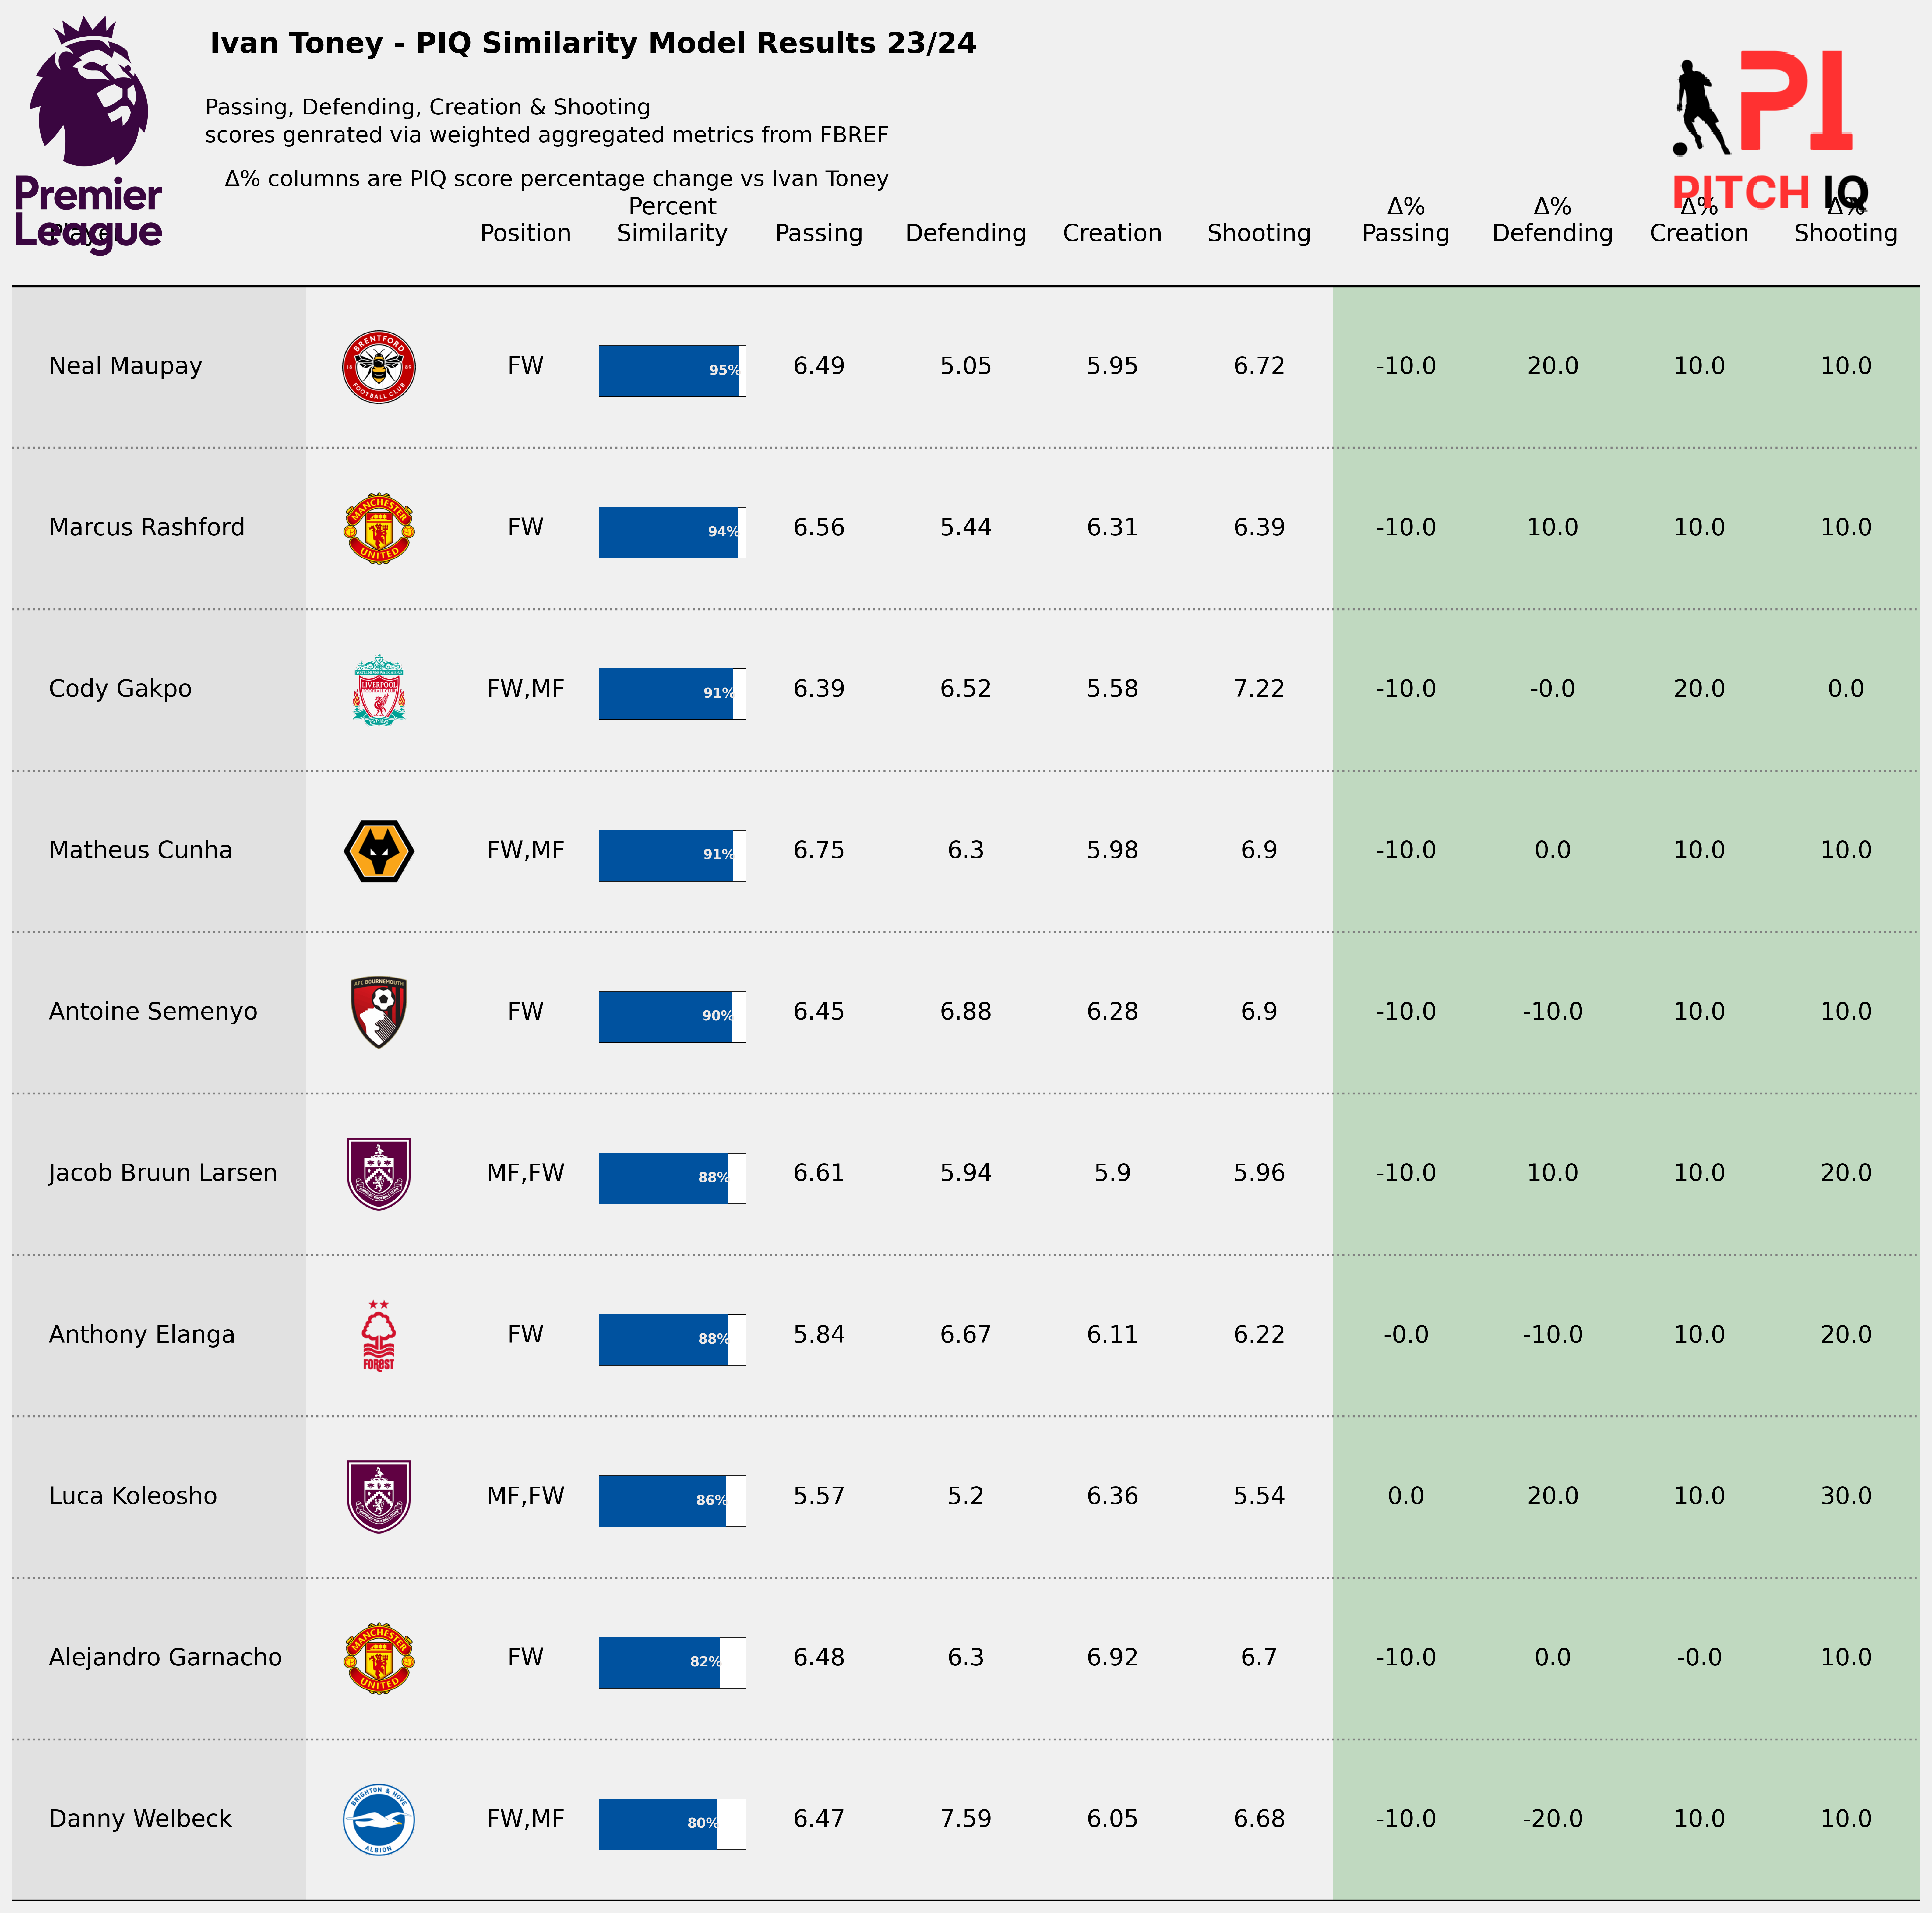

In [35]:
fig = plt.figure(figsize=(18,18), dpi=400)
ax = plt.subplot()

ncols = 12
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]
columns = ['Player', 'Pos', 'perc_similarity', 'Passing_Score', 'Defending_Score',	'Creation_Score', 'Shooting_Score','Δ% Passing','Δ% Defending','Δ% Creation','Δ% Shooting']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'perc_similarity':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['team_id'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    perc_battery(df_final['perc_similarity'].iloc[x], bar_ax)

# -- Add column names
column_names = ['Player', 'Position', 'Percent\nSimilarity','Passing', 'Defending',	'Creation', 'Shooting','Δ%\nPassing','Δ%\nDefending','Δ%\nCreation','Δ%\nShooting']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='book'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.fill_between(
    x=[0,2],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=0.5,
    ec='None'
)

ax.fill_between(
    x=[9,14],
    y1=nrows,
    y2=0,
    color='green',
    alpha=0.2,
    ec='None'
)

ax.set_axis_off()
# -- Final details
league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
league_ax = fig.add_axes([0.04, 0.82, 0.15, 0.11], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

ax.tick_params(axis='both', which='major', labelsize=8)

fig_text(
     x = 0.52, y = 0.91, 
    s = f'{player_name} - PIQ Similarity Model Results 23/24',
    va = "bottom", ha = "right",
    fontsize = 17, color = "black", font = "Karla", weight = "bold"
)

fig_text(
     x = 0.48, y = 0.87, 
    s = f'Passing, Defending, Creation & Shooting\nscores genrated via weighted aggregated metrics from FBREF',
    va = "bottom", ha = "right",
    fontsize = 13, color = "black", font = "Karla", weight = "book"
)
fig_text(
     x = 0.48, y = 0.85, 
    s = f'Δ% columns are PIQ score percentage change vs {player_name}',
    va = "bottom", ha = "right",
    fontsize = 13, color = "black", font = "Karla", weight = "book"
)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.83, 0.08, 0.10, 1.60])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


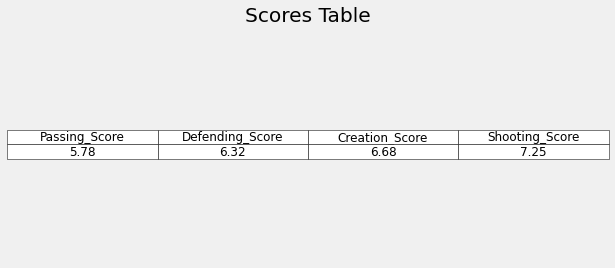

In [36]:
sim_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores]
sim_player[metric_scores] = \
    sim_player[metric_scores].round(2)

fig, ax = plt.subplots(figsize=(8, 4))


ax.axis('off')  # Hide the axes
tbl = ax.table(cellText=sim_player.values, colLabels=sim_player.columns, loc='center', cellLoc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)  # Adjust the table size if needed

plt.title('Scores Table')
plt.show()

In [37]:
# write up needed 